In [1]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()


In [3]:
# Reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [4]:
# Normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


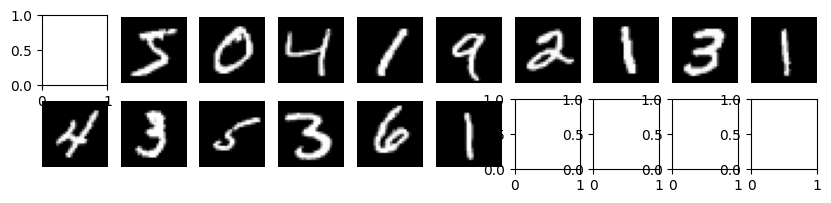

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and subplots
fig, ax = plt.subplots(2, 10, figsize=(10, 2))

# Iterate over the subplots
for i in range(15):
    # Add 1 to the index since indexing starts from 1
    ax_index = i + 1
    # Get the subplot corresponding to the index
    ax_row = ax_index // 10
    ax_col = ax_index % 10
    # Show the image on the subplot
    ax[ax_row, ax_col].imshow(x_train[i], cmap='gray')
    # Remove axis
    ax[ax_row, ax_col].axis('off')

plt.show()


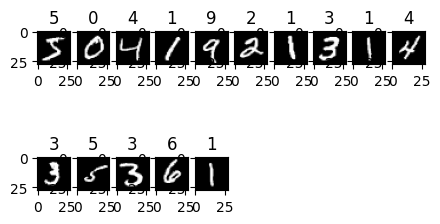

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with the specified size
fig = plt.figure(figsize=(5, 3))

# Iterate over the range of 15
for i in range(15):
    # Add 1 to the index since indexing starts from 1
    ax = fig.add_subplot(2, 10, i+1)
    # Show the image on the subplot
    ax.imshow(x_train[i], cmap='gray')
    # Set the title of the subplot to the corresponding label
    ax.set_title(y_train[i])

plt.show()


In [7]:
# Determine the shape of the input images
img_shape = x_train.shape[1:]
print(img_shape)


(28, 28, 1)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Defining the model
model = Sequential()

# Adding Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Adding Flatten layer
model.add(Flatten())

# Adding Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for the output layer

# Displaying the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Evaluating the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Printing the accuracy
print(f'Accuracy: {accuracy}')


Accuracy: 0.06260000169277191


In [9]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting the model to the training data
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2)


Epoch 1/10
469/469 - 30s - 64ms/step - accuracy: 0.9226 - loss: 0.2619
Epoch 2/10
469/469 - 23s - 50ms/step - accuracy: 0.9700 - loss: 0.0994
Epoch 3/10
469/469 - 25s - 53ms/step - accuracy: 0.9776 - loss: 0.0721
Epoch 4/10
469/469 - 25s - 54ms/step - accuracy: 0.9816 - loss: 0.0594
Epoch 5/10
469/469 - 24s - 52ms/step - accuracy: 0.9838 - loss: 0.0518
Epoch 6/10
469/469 - 25s - 54ms/step - accuracy: 0.9862 - loss: 0.0425
Epoch 7/10
469/469 - 26s - 55ms/step - accuracy: 0.9880 - loss: 0.0375
Epoch 8/10
469/469 - 26s - 55ms/step - accuracy: 0.9901 - loss: 0.0313
Epoch 9/10
469/469 - 25s - 53ms/step - accuracy: 0.9908 - loss: 0.0279
Epoch 10/10
469/469 - 24s - 51ms/step - accuracy: 0.9906 - loss: 0.0266


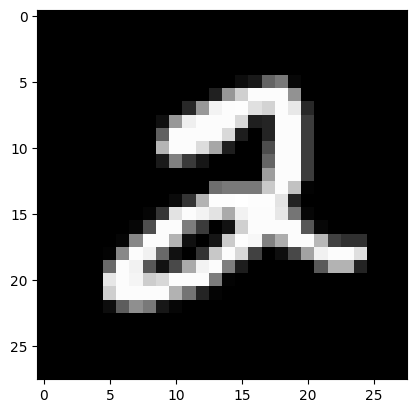

In [12]:
from matplotlib import pyplot as plt

# Assuming 'x_train' contains the training images and 'index' is the index of the image you want to display
image = x_train[5]

plt.imshow(np.squeeze(image), cmap='gray')
plt.show()


In [13]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])  # Reshape the image to match model input shape
p = model.predict(image)  # Predict the class probabilities for the image
predicted_class = np.argmax(p)  # Get the index of the class with the highest probability
print('Predicted: {}'.format(predicted_class))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
Predicted: 2
